In [1]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
url = 'https://pt.wikipedia.org/wiki/Lista_das_cidades_mais_populosas_do_mundo'
response = requests.get(url, headers = headers).content
soup = BeautifulSoup(response, 'html.parser')
table = soup.find_all('table', attrs = {'class':'sortable wikitable'})[0]

In [2]:
table

<table class="sortable wikitable" style="vertical-align:center; text-align:center; background:#FFFFF;">
<tbody><tr>
<th>Posição
</th>
<th>Cidade
</th>
<th>Imagem
</th>
<th>População
</th>
<th>Definição
</th>
<th>Área (km²)
</th>
<th>Densidade populacional (/km²)
</th>
<th>País
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Chongqing" title="Chongqing">Chongqing</a>
</td>
<td><a class="image" href="/wiki/Ficheiro:SkylineOfChongqing.jpg"><img alt="SkylineOfChongqing.jpg" data-file-height="1541" data-file-width="3870" decoding="async" height="50" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/39/SkylineOfChongqing.jpg/125px-SkylineOfChongqing.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/39/SkylineOfChongqing.jpg/188px-SkylineOfChongqing.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/39/SkylineOfChongqing.jpg/250px-SkylineOfChongqing.jpg 2x" width="125"/></a>
</td>
<td><span style="display:none">&amp;0000000030165500.000000</span>30 165 500<sup class="re

In [4]:
city = []
country = []
pop = []

for tr in table.tbody.find_all('tr'):
    column = tr.find_all('td')
    if len(column) == 0:
        continue
    city.append(tr.findAll('td')[1].a.get_text())
    country.append(tr.findAll('td')[7].a.get_text())
    parsed_population = 0
    try:
        population = tr.findAll('td')[3]
        parsed_population = int(float(population.span.text.replace("&","")))
    except:
        parsed_population = 0
    pop.append(parsed_population)

In [5]:
# city
print(city)

['Chongqing', 'Xangai', 'Lagos', 'Carachi', 'Istambul', 'Bombaim', 'Moscou', 'São Paulo', 'Pequim', 'Cantão', 'Deli', 'Shenzhen', 'Seul', 'Jacarta', 'Kinshasa', 'Tianjin', 'Tóquio', 'Chennai', 'Cairo', 'Dhaka', 'Cidade do México', 'Bangalore', 'Nova Iorque', 'Londres', 'Bangkok', 'Dongguan', 'Teerã', 'Bogotá', 'Cidade de Ho Chi Minh', 'Hong Kong', 'Bagdá']


In [6]:
# Country
print(country)

['China', 'China', 'Nigéria', 'Paquistão', 'Turquia', 'Índia', 'Rússia', 'Brasil', 'China', 'China', 'Índia', 'China', 'Coreia do Sul', 'Indonésia', 'República Democrática do Congo', 'China', 'Japão', 'Índia', 'Egito', 'Bangladesh', 'México', 'Índia', 'Estados Unidos', 'Reino Unido', 'Tailândia', 'China', 'Irão', 'Colômbia', 'Vietnã', 'China', 'Iraque']


In [7]:
# POpulation
# print(pop)
# population = [valor for valor in pop]
# population = ["{:,}".format(valor) for valor in pop]
population = [valor for valor in pop]
print(population)

[30165500, 17836133, 16060307, 13969284, 0, 12478447, 12380664, 12106920, 11716620, 11185600, 11007835, 10467400, 10388055, 9988329, 9735000, 9341844, 9071577, 8981087, 8922949, 8906039, 8874724, 8425970, 8405837, 8308369, 8280925, 8220207, 8154051, 7776845, 7681700, 7219700, 7180889]


In [8]:
# To data Frame
data = {'city': city, 'country': country, 'population': population}
data = pd.DataFrame(data)
data.head(30)

,city,country,population
0,Chongqing,China,30165500
1,Xangai,China,17836133
2,Lagos,Nigéria,16060307
3,Carachi,Paquistão,13969284
4,Istambul,Turquia,0
5,Bombaim,Índia,12478447
6,Moscou,Rússia,12380664
7,São Paulo,Brasil,12106920
8,Pequim,China,11716620
9,Cantão,China,11185600


In [9]:
# Export
data.to_csv(r'data/population.csv')

In [10]:
# Plot
import seaborn as sns
import matplotlib.pyplot as plt

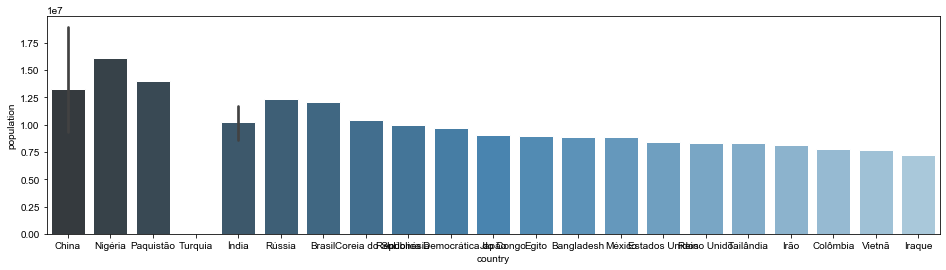

In [12]:
# Create Fig
# data = data.groupby([['country']])['population'].median()
fig, ax = plt.subplots(figsize=(16,4))
sns.set()
ax = sns.barplot("country", y="population", data=data,
                 palette="Blues_d")